In [1]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [4]:
import os
import pandas as pd

os.getcwd()

'/home/piai/BIG DATA 강의자료'

In [5]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 연습

#### 패키지 불러오기

In [6]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

### 데이터 구성하기

In [8]:
# 데이터 불러오기
df_raw = pd.read_csv("HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [9]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


#### 결측치 처리

In [10]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [11]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: ds_hmeq.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [12]:
# 결측치 처리 후 확인
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### 데이터 분리:목표변수/설명변수 분리

In [13]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw["BAD"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

#### 범주형 설명변수 더미변환

In [14]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


#### 연속형 설명변수 scaling 변환

In [15]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


#### 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형

In [16]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,1,0,0,0,0


#### 데이터 분할:Train vs. Test

In [17]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (2623, 18)
분할된 Test Data: (1125, 18)


## 모델 생성

#### 기본 옵션 모델 생성

In [18]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.945
Test Accuracy : 0.937


In [19]:
# 실행옵션 확인
print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


#### Cost 변경에 따른 모델 성능

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [21]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.945,0.937
3,10.00,0.981,0.953
4,100.00,0.996,0.954


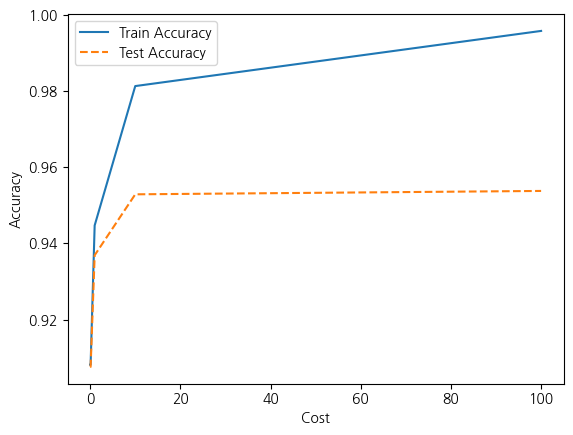

In [22]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [24]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.908,0.908
1,0.2,0.915,0.910
2,0.3,0.927,0.918
3,0.4,0.932,0.927
4,0.5,0.936,0.929
5,0.6,0.938,0.931
6,0.7,0.939,0.933
7,0.8,0.941,0.936
8,0.9,0.942,0.936
9,1.0,0.945,0.937


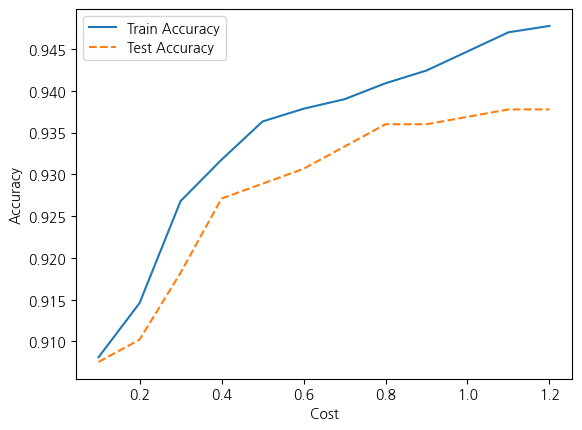

In [25]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

#### Gamma(데이터 영향 범위) 변경에 따른 모델 성능

In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [27]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9211,0.9191
1,0.10,0.9443,0.9369
2,1.00,0.9901,0.9164
3,10.00,0.9226,0.9076
4,100.00,0.9081,0.9076


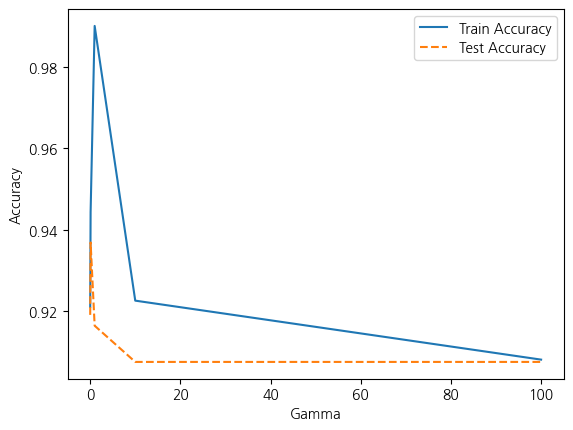

In [28]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [29]:
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [30]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.9443,0.9369
1,0.2,0.9638,0.9396
2,0.3,0.9745,0.9307
3,0.4,0.9802,0.9271
4,0.5,0.9828,0.9227
5,0.6,0.9836,0.9200
6,0.7,0.9844,0.9191
7,0.8,0.9867,0.9182
8,0.9,0.9882,0.9173
9,1.0,0.9901,0.9164


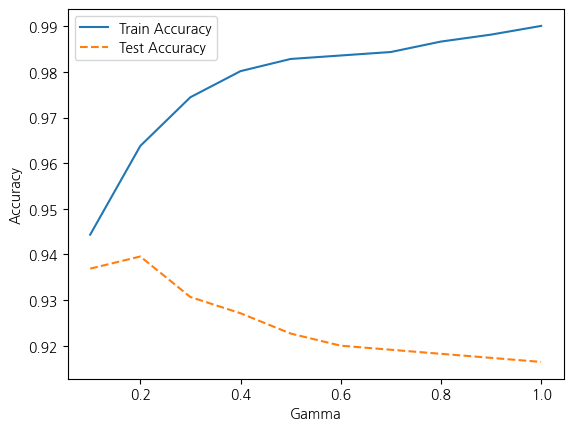

In [31]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

## 결론 도출

In [32]:
# 최종 모델
svc_final = SVC(gamma=0.2, C=0.8, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.964
Test Accuracy : 0.940

Test Confusion matrix: 
[[1021    0]
 [  68   36]]
              precision    recall  f1-score   support

           0      0.938     1.000     0.968      1021
           1      1.000     0.346     0.514       104

    accuracy                          0.940      1125
   macro avg      0.969     0.673     0.741      1125
weighted avg      0.943     0.940     0.926      1125



### Grid Search

## End of SVM